# Fishing optimaly

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import gym 
import gym_fishing

## Continuous action space 

In [4]:
cts_env = gym.make('fishing-v1')

In [25]:
def simul(environment) :
  time_step = np.array([environment.reset()])
  episode_return = np.array([0.0])
  output = np.zeros(shape = (1000, 4))

  for it in range(1000):
    action = max(time_step[0] - 0.5, np.array([0.0]) )
    time_step = environment.step(action)
    episode_return += action
    output[it] = (it, time_step[0], action, episode_return)
  return output 

In [26]:
out=simul(cts_env)

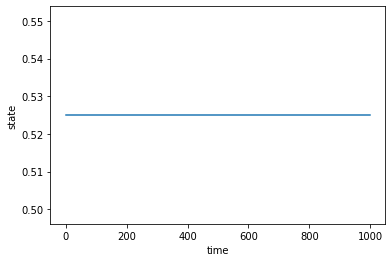

In [28]:
plt.plot(out[:,1])
plt.ylabel('state')
plt.xlabel('time')
plt.show()

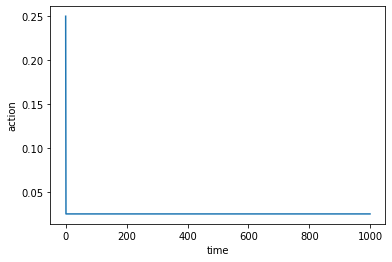

In [29]:
plt.plot(out[:,2])
plt.ylabel('action')
plt.xlabel('time')
plt.show()

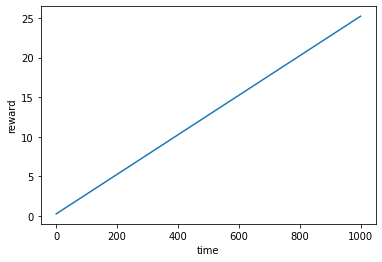

In [30]:
plt.plot(out[:,3])
plt.ylabel('reward')
plt.xlabel('time')
plt.show()

## Discrete Action Space

In [33]:
env = gym.make('fishing-v0')

In [48]:
def simulate(environment) :
    time_step = environment.reset()
    episode_return = 0.0
    output = np.zeros(shape = (1000, 4))

    action = 0
    time_step = environment.step(action)
    episode_return += time_step[1]
    output[0] = (0, time_step[0], action, episode_return)

    for it in range(1,1000):
        if time_step[1] <= max(time_step[0] - 0.5, 0.0) :
            action = 1
        if time_step[1] > max(time_step[0] - 0.5, 0.0) :
            action = 2

        time_step = environment.step(action)
        episode_return += time_step[1]
        output[it] = (it, time_step[0], action, episode_return)
    return output    

In [46]:
time_step = env.reset()
time_step =env.step(1)
time_step

(array([0.747892]), 0.015, False, {})

In [50]:
out = simulate(env)

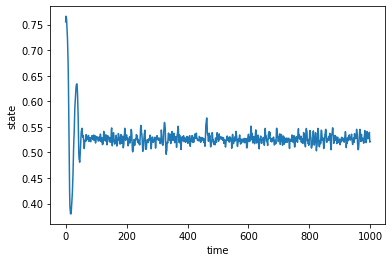

In [51]:
plt.plot(out[:,1])
plt.ylabel('state')
plt.xlabel('time')
plt.show()

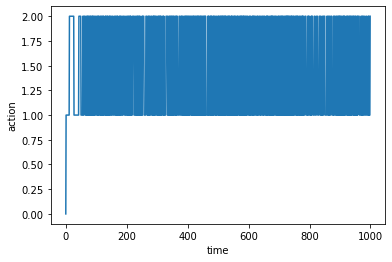

In [52]:
plt.plot(out[:,2])
plt.ylabel('action')
plt.xlabel('time')
plt.show()

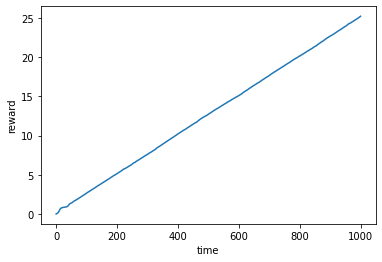

In [53]:
plt.plot(out[:,3])
plt.ylabel('reward')
plt.xlabel('time')
plt.show()